# **RK4**

In [44]:
# order 1 ODE
from sympy import *

x, y = symbols('x y')

def rk4_1(f, a, y0, n, h):
  x = [(lambda i: a + i * h)(i) for i in range(n+1)]
  y = [0]*(n+1)
  y[0] = y0

  for i in range(0, n):
    k1 = h*f(x[i], y[i])
    k2 = h*f(x[i] + (h/2), y[i] + (k1/2))
    k3 = h*f(x[i] + (h/2), y[i] + (k2/2))
    k4 = h*f(x[i] + h, y[i] + k3)
    y[i + 1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    print(f"{i+1}. K1={k1:.5f}, K2={k2:.5f}, K3={k3:.5f}, K4={k4:.5f}, y={y[i+1]:.5f}")
    #print(f"{i+1} & {x[i+1]:.2f} & {k1:.5f} & {k2:.5f} & {k3:.5f} & {k4:.5f} & {y[i+1]:.7f}")

  return x, y

In [45]:
x, y = symbols('x y')
f = lambdify([x, y],  1+y/x+(y/x)**2)
a = 1
b = 3
y0 = 0
n = 10
h = (b - a)/n

x, y = rk4_1(f, a, y0, n, h)
for i in range(0, n+1):
  print(f"x = {x[i]:.1f}, \t y = {y[i]}")

1. K1=0.20000, K2=0.21983, K3=0.22198, K4=0.24384, y=0.22125
2. K1=0.24367, K2=0.26671, K3=0.26943, K4=0.29467, y=0.48968
3. K1=0.29442, K2=0.32098, K3=0.32427, K4=0.35350, y=0.81275
4. K1=0.35320, K2=0.38413, K3=0.38809, K4=0.42244, y=1.19943
5. K1=0.42207, K2=0.45869, K3=0.46349, K4=0.50456, y=1.66127
6. K1=0.50412, K2=0.54824, K3=0.55420, K4=0.60423, y=2.21347
7. K1=0.60368, K2=0.65792, K3=0.66546, K4=0.72770, y=2.87649
8. K1=0.72701, K2=0.79512, K3=0.80495, K4=0.88416, y=3.67838
9. K1=0.88326, K2=0.97088, K3=0.98408, K4=1.08759, y=4.65851
10. K1=1.08636, K2=1.20220, K3=1.22060, K4=1.36003, y=5.87384
x = 1.0, 	 y = 0
x = 1.2, 	 y = 0.22124570728881263
x = 1.4, 	 y = 0.4896841664433652
x = 1.6, 	 y = 0.8127521620240105
x = 1.8, 	 y = 1.1994320216392405
x = 2.0, 	 y = 1.6612651154486868
x = 2.2, 	 y = 2.2134693165763624
x = 2.4, 	 y = 2.8764941145415404
x = 2.6, 	 y = 3.6783789960992457
x = 2.8, 	 y = 4.658506283682282
x = 3.0, 	 y = 5.873838569832787


In [46]:
# order 2 ODE
from sympy import *
x, y, p = symbols('x y p')
# p=y', q=y''
def rk4_2(f, a, y0, p0, h, n):
  x = [(lambda i: a + i * h)(i) for i in range(n+1)]
  y = [0]*(n+1)
  p = [0]*(n+1)
  y[0] = y0
  p[0] = p0

  for i in range(0, n):
    k1_y = h*p[i]
    k1_p = h*f(x[i], y[i], p[i])

    k2_y = h*(p[i] + (k1_p/2))
    k2_p = h*f(x[i] + (h/2), y[i] + (k1_y/2), p[i] + (k1_p/2))

    k3_y = h*(p[i] + (k2_p/2))
    k3_p = h*f(x[i] + (h/2), y[i] + (k2_y/2), p[i] + (k2_p/2))


    k4_y = h*(p[i] + k3_p)
    k4_p = h*f(x[i] + h, y[i] + k3_y, p[i] + k3_p)

    y[i + 1] = y[i] + (k1_y + 2*k2_y + 2*k3_y + k4_y)/6
    p[i + 1] = p[i] + (k1_p + 2*k2_p + 2*k3_p + k4_p)/6
    print(f"{i+1}. K1={k1_y:.5f}, K2={k2_y:.5f}, K3={k3_y:.5f}, K4={k4_y:.5f}, y={y[i+1]:.5f}, y'={p[i+1]:.5f}")

  return x, y

In [47]:
x, y, p = symbols('x y p')
# p=y', q=y''
f = lambdify([x, y, p],  -25*y )

a, y0, p0, b = (0, 1, 0, 2)
h = 0.1
n = int((b - a)/h)

x, y = rk4_2(f, a, y0, p0, h, n)
for i in range(0, n+1):
  err = abs(y[i]-(cos(5*x[i])))
  print(f"x = {x[i]:.1f}, \t y = {y[i]}, \t err = {err}")

1. K1=0.00000, K2=-0.12500, K3=-0.12500, K4=-0.23438, y=0.87760, y'=-2.39583
2. K1=-0.23958, K2=-0.34928, K3=-0.33431, K4=-0.41532, y=0.54059, y'=-4.20519
3. K1=-0.42052, K2=-0.48809, K3=-0.46181, K4=-0.49465, y=0.07143, y'=-4.98565
4. K1=-0.49856, K2=-0.50749, K3=-0.47633, K4=-0.45298, y=-0.41511, y'=-4.54655
5. K1=-0.45466, K2=-0.40277, K3=-0.37435, K4=-0.30053, y=-0.80001, y'=-2.99554
6. K1=-0.29955, K2=-0.19955, K3=-0.18083, K4=-0.07461, y=-0.98917, y'=-0.71221
7. K1=-0.07122, K2=0.05243, K3=0.05688, K4=0.16952, y=-0.93635, y'=1.74484
8. K1=0.17448, K2=0.29153, K3=0.28062, K4=0.37213, y=-0.65453, y'=3.77462
9. K1=0.37746, K2=0.45928, K3=0.43569, K4=0.48368, y=-0.21268, y'=4.88077
10. K1=0.48808, K2=0.51466, K3=0.48416, K4=0.47691, y=0.28109, y'=4.79294
11. K1=0.47929, K2=0.44416, K3=0.41420, K4=0.35350, y=0.70601, y'=3.53286
12. K1=0.35329, K2=0.26504, K3=0.24295, K4=0.14366, y=0.95816, y'=1.40898
13. K1=0.14090, K2=0.02113, K3=0.01232, K4=-0.10128, y=0.97591, y'=-1.05907
14. K1=-0

In [48]:
# order 3 ODE
from sympy import *
x, y, p, q = symbols('x y p q')
# p=y', q=y''
def rk4_3(f, a, y0, p0, q0, h, n):
  x = [(lambda i: a + i * h)(i) for i in range(n+1)]
  y = [0]*(n+1)
  p = [0]*(n+1)
  q = [0]*(n+1)
  y[0] = y0
  p[0] = p0
  q[0] = q0

  for i in range(0, n):
    k1_y = h*p[i]
    k1_p = h*q[i]
    k1_q = h*f(x[i], y[i], p[i], q[i])

    k2_y = h*(p[i] + (k1_p/2))
    k2_p = h*(q[i] + (k1_q/2))
    k2_q = h*f(x[i] + (h/2), y[i] + (k1_y/2), p[i] + (k1_p/2), q[i] + (k1_q/2))

    k3_y = h*(p[i] + (k2_p/2))
    k3_p = h*(q[i] + (k2_q/2))
    k3_q = h*f(x[i] + (h/2), y[i] + (k2_y/2), p[i] + (k2_p/2), q[i] + (k2_q/2))


    k4_y = h*(p[i] + k3_p)
    k4_p = h*(q[i] + k3_q)
    k4_q = h*f(x[i] + h, y[i] + k3_y, p[i] + k3_p, q[i] + k3_q)

    y[i + 1] = y[i] + (k1_y + 2*k2_y + 2*k3_y + k4_y)/6
    p[i + 1] = p[i] + (k1_p + 2*k2_p + 2*k3_p + k4_p)/6
    q[i + 1] = q[i] + (k1_q + 2*k2_q + 2*k3_q + k4_q)/6

  return x, y, p, q

In [49]:
x, y, p, q = symbols('x y p q')
# p=y', q=y''
f = lambdify([x, y, p, q], -q/x + 2*p/(x**2) - 2*y/(x**3) +8 -2/(x**3) )
act =  lambdify([x], 2*x - 1/x + x*x + (x**3) -1)

a, y0, p0, q0, b = (1, 2, 8, 6, 2)
h = 0.2
n = int((b - a)/h)

x, y, p, q= rk4_3(f, a, y0, p0, q0, h, n)
for i in range(0, n+1):
  err = abs(y[i] - act(x[i]))
  print(f"x = {x[i]:.1f}, \t y' = {p[i]},\t act = {act(x[i])}, \t y = {y[i]}, \t err = {err}")

x = 1.0, 	 y' = 8,	 act = 2.0, 	 y = 2, 	 err = 0.0
x = 1.2, 	 y' = 9.414750358582065,	 act = 3.734666666666666, 	 y = 3.7346396193338345, 	 err = 2.7047332831653392e-05
x = 1.4, 	 y' = 11.190626895777307,	 act = 5.789714285714284, 	 y = 5.789742627149508, 	 err = 2.834143522356669e-05
x = 1.6, 	 y' = 13.271121741328002,	 act = 8.231000000000002, 	 y = 8.231114377089533, 	 err = 0.00011437708953110359
x = 1.8, 	 y' = 15.62920276414479,	 act = 11.116444444444445, 	 y = 11.116662521585537, 	 err = 0.00021807714109201015
x = 2.0, 	 y' = 18.25062339944062,	 act = 14.5, 	 y = 14.500335865040103, 	 err = 0.0003358650401033003


# 4th order Adams-Bashforth

In [50]:
# 4 step

x, y = symbols('x y')
f = lambdify([x, y],  y-(x**2)+1)
a = 0
b = 2
y0 = 0.5
h = 0.2
n = int((b - a)/h)

x, y = rk4_1(f, a, y0, n, h)

print("RK 4 values:")
for i in range(0, 4):
  print(f"x = {x[i]:.1f}, \t y = {y[i]}")

for i in range(4, n+1):
  y[i] = y[i-1] + (h/24) * (55*f(x[i-1],y[i-1]) - 59*f(x[i-2],y[i-2]) + 37*f(x[i-3],y[i-3]) - 9*f(x[i-4],y[i-4]))

print("Adam-Bashforth values:")
for i in range(0, n+1):
  print(f"x = {x[i]:.1f}, \t y = {y[i]}")

1. K1=0.30000, K2=0.32800, K3=0.33080, K4=0.35816, y=0.82929
2. K1=0.35786, K2=0.38364, K3=0.38622, K4=0.41110, y=1.21408
3. K1=0.41082, K2=0.43390, K3=0.43620, K4=0.45806, y=1.64892
4. K1=0.45778, K2=0.47756, K3=0.47954, K4=0.49769, y=2.12720
5. K1=0.49744, K2=0.51318, K3=0.51476, K4=0.52839, y=2.64082
6. K1=0.52816, K2=0.53898, K3=0.54006, K4=0.54818, y=3.17989
7. K1=0.54798, K2=0.55278, K3=0.55326, K4=0.55463, y=3.73234
8. K1=0.55447, K2=0.55191, K3=0.55166, K4=0.54480, y=4.28341
9. K1=0.54468, K2=0.53315, K3=0.53200, K4=0.51508, y=4.81509
10. K1=0.51502, K2=0.49252, K3=0.49027, K4=0.46107, y=5.30536
RK 4 values:
x = 0.0, 	 y = 0.5
x = 0.2, 	 y = 0.8292933333333334
x = 0.4, 	 y = 1.2140762106666667
x = 0.6, 	 y = 1.6489220170416001
Adam-Bashforth values:
x = 0.0, 	 y = 0.5
x = 0.2, 	 y = 0.8292933333333334
x = 0.4, 	 y = 1.2140762106666667
x = 0.6, 	 y = 1.6489220170416001
x = 0.8, 	 y = 2.1272892490523336
x = 1.0, 	 y = 2.6410533281114223
x = 1.2, 	 y = 3.1803141288329204
x = 1.4, 

# 4th order Adams-Moulton

In [51]:
# 3 step
x, y = symbols('x y')
f = lambdify([x, y],  y-(x**2)+1)
a = 0
b = 2
y0 = 0.5
h = 0.2
n = int((b - a)/h)

x, y = rk4_1(f, a, y0, n, h)

print("RK 4 values:")
for i in range(0, 3):
  print(f"x = {x[i]:.1f}, \t y = {y[i]}")

for i in range(3, n+1):
  temp = y[i-1] + (h/24) * (19*f(x[i-1],y[i-1]) - 5*f(x[i-2],y[i-2]) + f(x[i-3],y[i-3]))
  y[i] = ((h/24)*9*(-1*(x[i]**2)+1) + temp) / (1 - (h*9/24)) #making y[i] the subject

print("Adam-Moulton values:")
for i in range(0, n+1):
  print(f"x = {x[i]:.1f}, \t y = {y[i]}")

1. K1=0.30000, K2=0.32800, K3=0.33080, K4=0.35816, y=0.82929
2. K1=0.35786, K2=0.38364, K3=0.38622, K4=0.41110, y=1.21408
3. K1=0.41082, K2=0.43390, K3=0.43620, K4=0.45806, y=1.64892
4. K1=0.45778, K2=0.47756, K3=0.47954, K4=0.49769, y=2.12720
5. K1=0.49744, K2=0.51318, K3=0.51476, K4=0.52839, y=2.64082
6. K1=0.52816, K2=0.53898, K3=0.54006, K4=0.54818, y=3.17989
7. K1=0.54798, K2=0.55278, K3=0.55326, K4=0.55463, y=3.73234
8. K1=0.55447, K2=0.55191, K3=0.55166, K4=0.54480, y=4.28341
9. K1=0.54468, K2=0.53315, K3=0.53200, K4=0.51508, y=4.81509
10. K1=0.51502, K2=0.49252, K3=0.49027, K4=0.46107, y=5.30536
RK 4 values:
x = 0.0, 	 y = 0.5
x = 0.2, 	 y = 0.8292933333333334
x = 0.4, 	 y = 1.2140762106666667
Adam-Moulton values:
x = 0.0, 	 y = 0.5
x = 0.2, 	 y = 0.8292933333333334
x = 0.4, 	 y = 1.2140762106666667
x = 0.6, 	 y = 1.6489200596036035
x = 0.8, 	 y = 2.1271964014855933
x = 1.0, 	 y = 2.640808790262578
x = 1.2, 	 y = 3.179868107195261
x = 1.4, 	 y = 3.732295669822648
x = 1.6, 	 y =

# Linear Shooting (BVP)

In [52]:
x, y, p= symbols('x y p')
# y" = p(x) y' + q(x) y + r(x)., (a,y0),(b,yn)
a = 1
b = 2
y0 = 0
yn = 24
h = 0.05
n = int((b - a)/h)

f1 = lambdify([x, y, p],  5*(p/x) - 8*y/(x**2))
f2 = lambdify([x, y, p],  5*(p/x) - 8*y/(x**2))
print("Y1 RK4 values:")
x, y1 = rk4_2(f1, a, y0, 0, h, n)
print("Y2 RK4 values:")
x, y2 = rk4_2(f2, a, 0, 1, h, n)

y = [0]*100

for i in range(0, n+1):
  y[i] = y1[i] + (yn - y1[n])*(y2[i]/y2[n])

print("Linear shooting values:")
for i in range(0, n+1):
  err = abs(y[i]-(2*((x[i]**4) - (x[i]**2))))
  print(f"x = {x[i]:.2f}, \t y1 = {y1[i]:.7f}, \t y2 = {y2[i]:.7f}, \ty = {y[i]:.7f},\t err ={err:<15.5E}")

Y1 RK4 values:
1. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
2. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
3. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
4. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
5. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
6. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
7. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
8. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
9. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
10. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
11. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
12. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
13. K1=0.00000, K2=0.00000, K3=0.00000, K4=0.00000, y=0.00000, y'=0.00000
14. K1=0.00000, K2=0.00000, K3=0

In [53]:
# Example 2
x, y, p= symbols('x y p')
# y" = p(x) y' + q(x) y + r(x)., (a,y0),(b,yn)
a = 1
b = 2
y0 = 1
yn = 2
h = 0.1
n = int((b - a)/h)

f1 = lambdify([x, y, p],  -2*p/x + 2*y/(x**2) + sin(log(x))/(x**2))
f2 = lambdify([x, y, p],  -2*p/x + 2*y/(x**2) )
x, y1 = rk4_2(f1, a, y0, 0, h, n)
x, y2 = rk4_2(f2, a, 0, 1, h, n)

y = [0]*100

for i in range(0, n+1):
  y[i] = y1[i] + (yn - y1[n])*(y2[i]/y2[n])

print("Linear shooting values:")
for i in range(0, n+1):
  err = abs(y[i]-(1.1392070132*x[i] - 0.03920701320/(x[i]**2) - 3/10*sin(log(x[i])) - 1/10*cos(log(x[i]))))
  #print(f"x = {x[i]:.2f}, \t y = {y[i]:.7f}, \t err = {err:.10f}")
  print(f"x = {x[i]:<10.2f} \t y1 = {y1[i]:<15.7f} \t y2 = {y2[i]:<15.7f} \t y = {y[i]:<15.7f}")

1. K1=0.00000, K2=0.01000, K3=0.00834, K4=0.01709, y=1.00896, y'=0.16979
2. K1=0.01698, K2=0.02417, K3=0.02310, K4=0.02946, y=1.03245, y'=0.29394
3. K1=0.02939, K2=0.03474, K3=0.03402, K4=0.03880, y=1.06674, y'=0.38765
4. K1=0.03877, K2=0.04286, K3=0.04236, K4=0.04605, y=1.10929, y'=0.46028
5. K1=0.04603, K2=0.04924, K3=0.04888, K4=0.05180, y=1.15830, y'=0.51782
6. K1=0.05178, K2=0.05435, K3=0.05409, K4=0.05644, y=1.21248, y'=0.56426
7. K1=0.05643, K2=0.05852, K3=0.05832, K4=0.06024, y=1.27087, y'=0.60234
8. K1=0.06023, K2=0.06196, K3=0.06181, K4=0.06341, y=1.33274, y'=0.63399
9. K1=0.06340, K2=0.06485, K3=0.06472, K4=0.06607, y=1.39751, y'=0.66061
10. K1=0.06606, K2=0.06728, K3=0.06719, K4=0.06833, y=1.46473, y'=0.68323
1. K1=0.10000, K2=0.09000, K3=0.09188, K4=0.08331, y=0.09118, y'=0.83421
2. K1=0.08342, K2=0.07659, K3=0.07777, K4=0.07185, y=0.16851, y'=0.71914
3. K1=0.07191, K2=0.06709, K3=0.06786, K4=0.06364, y=0.23609, y'=0.63678
4. K1=0.06368, K2=0.06018, K3=0.06069, K4=0.05761,

# Non-Linear Shooting (BVP)

In [54]:
from numpy import zeros, abs

def shoot_nonlinear(a,b,alpha, beta, n, tol, M):

    w1 = zeros(n+1)
    w2 = zeros(n+1)
    h = (b-a)/n
    k = 1
    TK = (beta - alpha)/(b - a)

    while k <= M:

        w1[0] = alpha
        w2[0] = TK
        u1    = 0
        u2    = 1

        for i in range(1,n+1):
            x = a + (i-1)*h     #step 5

            t = x + 0.5*(h)
            k11 = h*w2[i-1]     #step 6
            k12 = h*f(x,w1[i-1],w2[i-1])
            k21 = h*(w2[i-1] + (1/2)*k12)
            k22 = h*f(t, w1[i-1] + (1/2)*k11, w2[i-1] + (1/2)*k12)
            k31 = h*(w2[i-1] + (1/2)*k22)
            k32 = h*f(t, w1[i-1] + (1/2)*k21, w2[i-1] + (1/2)*k22)
            t   = x + h
            k41 = h*(w2[i-1]+k32)
            k42 = h*f(t, w1[i-1] + k31, w2[i-1] + k32)
            w1[i] = w1[i-1] + (k11 + 2*k21 + 2*k31 + k41)/6
            w2[i] = w2[i-1] + (k12 + 2*k22 + 2*k32 + k42)/6
            kp11 = h*u2
            kp12 = h*(fy(x,w1[i-1],w2[i-1])*u1 + fyp(x,w1[i-1], w2[i-1])*u2)
            t    = x + 0.5*(h)
            kp21 = h*(u2 + (1/2)*kp12)
            kp22 = h*((fy(t, w1[i-1],w2[i-1])*(u1 + (1/2)*kp11)) + fyp(x+h/2, w1[i-1],w2[i-1])*(u2 +(1/2)*kp12))
            kp31 = h*(u2 + (1/2)*kp22)
            kp32 = h*((fy(t, w1[i-1],w2[i-1])*(u1 + (1/2)*kp21)) + fyp(x+h/2, w1[i-1],w2[i-1])*(u2 +(1/2)*kp22))
            t    = x + h
            kp41 = h*(u2 + kp32)
            kp42 = h*(fy(t, w1[i-1], w2[i-1])*(u1+kp31) + fyp(x + h, w1[i-1], w2[i-1])*(u2 + kp32))
            u1 = u1 + (1/6)*(kp11 + 2*kp21 + 2*kp31 + kp41)
            u2 = u2 + (1/6)*(kp12 + 2*kp22 + 2*kp32 + kp42)


        r = abs(w1[n] - beta)
        print("t_k =", TK)
        if r < tol:
            for i in range(0,n+1):
                x = a + i*h
                err = abs(w1[i]-act(x)) #actual solution
                print(f"x = {x:.2f} \t y' = {w2[i]:<15.7f} \t y = {w1[i]:<15.8f}\t err = {err:<15.8f}")
            return

        TK = TK -(w1[n]-beta)/u1
        print("z(b, t_k) =", u1)

        k = k+1


    print("Maximum number of iterations exceeded")
    for i in range(0,n+1):
          x = a + i*h
          err = abs(w1[i]-act(x))
          print(f"x = {x:.2f} \t y' = {w2[i]:<15.7f} \t y = {w1[i]:<15.8f}\t err = {err:<15.8f}")

    return

In [55]:
# Book example
def f(x,y,yp):
  fx = (1/8)*(32 + 2*x**3 -y*yp)
  return fx

def fy(xp,z,zp):
  fyy = -(1/8)*(zp)
  return fyy

def fyp(xpp,zpp,zppp):
  fypp = -(1/8)*(zpp)
  return fypp

def act(x):
  return (x**2)+16/x


a = 1         # start point
b = 3         # end point
alpha = 17    # boundary condition
beta = 43/3   # boundary condition
N = 20        # number of subintervals
M = 20        # maximum number of iterations
tol = 0.00001 # tolerance


shoot_nonlinear(a,b,alpha,beta,N,tol,M)


t_k = -1.333333333333333
z(b, t_k) = 0.41323707235438883
t_k = -16.205835190390005
z(b, t_k) = 0.6486678346421305
t_k = -14.115934374299101
z(b, t_k) = 0.5959059783905283
t_k = -14.00147087116826
z(b, t_k) = 0.593306639841407
t_k = -14.000203289696158
x = 1.00 	 y' = -14.0002033     	 y = 17.00000000    	 err = 0.00000000     
x = 1.10 	 y' = -11.0233478     	 y = 15.75549513    	 err = 0.00004058     
x = 1.20 	 y' = -8.7113017      	 y = 14.77338929    	 err = 0.00005596     
x = 1.30 	 y' = -6.8676242      	 y = 13.99775170    	 err = 0.00005939     
x = 1.40 	 y' = -5.3634123      	 y = 13.38862856    	 err = 0.00005713     
x = 1.50 	 y' = -4.1112386      	 y = 12.91671893    	 err = 0.00005227     
x = 1.60 	 y' = -3.0501106      	 y = 12.56004635    	 err = 0.00004635     
x = 1.70 	 y' = -2.1364283      	 y = 12.30180487    	 err = 0.00004017     
x = 1.80 	 y' = -1.3383553      	 y = 12.12892302    	 err = 0.00003413     
x = 1.90 	 y' = -0.6322059      	 y = 12.03108107    	 

In [56]:
#check the K values with this RK4
x, y, p = symbols('x y p')
# p=y', q=y''
f = lambdify([x, y, p],  (1/8)*(32 + 2*x**3 -y*p) )

a, y0, p0, b = (1, 17, -1.333333333333333, 3)
h = 0.1
n = int((b - a)/h)

x, y = rk4_2(f, a, y0, p0, h, n)
for i in range(0, n+1):
  #err = abs(y[i]-(cos(5*x[i])))
  print(f"x = {x[i]:.1f}, \t y = {y[i]}")

1. K1=-0.13333, K2=-0.09792, K3=-0.10152, K4=-0.06893, y=16.89981, y'=-0.69205
2. K1=-0.06920, K2=-0.04023, K3=-0.04306, K4=-0.01632, y=16.85779, y'=-0.16530
3. K1=-0.01653, K2=0.00737, K3=0.00514, K4=0.02727, y=16.86375, y'=0.27105
4. K1=0.02710, K2=0.04699, K3=0.04522, K4=0.06371, y=16.90963, y'=0.63581
5. K1=0.06358, K2=0.08029, K3=0.07889, K4=0.09449, y=16.98903, y'=0.94388
6. K1=0.09439, K2=0.10858, K3=0.10748, K4=0.12080, y=17.09692, y'=1.20724
7. K1=0.12072, K2=0.13294, K3=0.13208, K4=0.14362, y=17.22932, y'=1.43560
8. K1=0.14356, K2=0.15424, K3=0.15358, K4=0.16373, y=17.38314, y'=1.63693
9. K1=0.16369, K2=0.17320, K3=0.17270, K4=0.18181, y=17.55602, y'=1.81781
10. K1=0.18178, K2=0.19041, K3=0.19005, K4=0.19839, y=17.74620, y'=1.98369
11. K1=0.19837, K2=0.20637, K3=0.20612, K4=0.21392, y=17.95241, y'=2.13911
12. K1=0.21391, K2=0.22149, K3=0.22133, K4=0.22878, y=18.17380, y'=2.28783
13. K1=0.22878, K2=0.23611, K3=0.23603, K4=0.24329, y=18.40986, y'=2.43299
14. K1=0.24330, K2=0.25

# Linear Finite Difference

In [57]:
def lin_FD(p, q, r, x_a, x_b, y_a, y_b, h):
    n = int((x_b - x_a)/h)
    a = [0]*100
    b = [0]*100
    c = [0]*100
    d = [0]*100
    x = [(lambda i: x_a + i * h)(i) for i in range(n+1)]

    # for i=1
    a[1] = 2 + (h**2)*q(x[1])
    b[1] = - 1 + (h/2)*p(x[1])
    c[1] = 0.0
    d[1] = - (h**2)*r(x[1]) + (1 +(h/2)*p(x[1]))*y_a

    for i in range(2,n-1):
        a[i] = 2 + (h**2)*q(x[i])
        b[i] = - 1 + (h/2)*p(x[i])
        c[i] = - 1 - (h/2)*p(x[i])
        d[i] = - (h**2)*r(x[i])

    # for i=n-1
    a[n-1] = 2 + (h**2)*q(x[n-1])
    b[n-1] = 0.0
    c[n-1] = - 1 - (h/2)*p(x[n-1])
    d[n-1] = - (h**2)*r(x[n-1]) + (1 - (h/2)*p(x[n-1]))*y_b

    # for i in range(n+1):
    #     print(f"a = {a[i]:.5f} \t b = {b[i]:<15.5f} \t c = {c[i]:<15.5f} \t d = {d[i]:<15.5f}")

    # Solving the trigonal Matrix
    l = [0]*100
    u = [0]*100
    z = [0]*100

    l[1] = a[1]
    u[1] = b[1]/l[1]
    z[1] = d[1]/l[1]

    for i in range(2,n-1):
        l[i] = a[i] - c[i]*u[i-1]
        u[i] = b[i]/l[i]
        z[i] = (d[i] - c[i]*z[i-1])/l[i]

    l[n-1] = a[n-1] - c[n-1]*u[n-2]
    z[n-1] = (d[n-1] - c[n-1]*z[n-2])/l[n-1]
    #Solution in w
    w = [0]*100
    w[0] = y_a
    w[n] = y_b
    w[n-1] = z[n-1]

    for i in range(n-2, 0, -1):
        w[i] = z[i] - u[i]*w[i+1]

    return x, w

In [60]:
# DE: x^2*y'' - 5x*y' + 8y = 0, y(1)=0, y(2)=24
from sympy import *
x, y, p = symbols('x y p')

x_a, x_b, y_a, y_b =  (0, 1.57079632679, -0.3, -0.1)
h = 0.39269908169
n = int((x_b-x_a)/h)

p = lambdify([x], 1)
q = lambdify([x], 2)
r = lambdify([x], cos(x))
act = lambdify([x], -(sin(x) + 3*cos(x))/10)

x, w = lin_FD(p, q, r, x_a, x_b, y_a, y_b, h)

for i in range(n+1):
  err = abs(w[i] - act(x[i]))
  print(f"x = {x[i]:.2f} \t y' = {w[i]:<15.8f} \t err = {err:<15.8f}")

x = 0.00 	 y' = -0.30000000     	 err = 0.00000000     
x = 0.39 	 y' = -0.31568540     	 err = 0.00025320     
x = 0.79 	 y' = -0.28290585     	 err = 0.00006314     
x = 1.18 	 y' = -0.20699563     	 err = 0.00019735     
x = 1.57 	 y' = -0.10000000     	 err = 0.00000000     


# Non-Linear Finite Difference

In [61]:
def non_lin_FD(f, f_y, f_p, x_a, x_b, y_a, y_b, h):
    n = int((x_b - x_a)/h)
    w = [0]*100
    w[0] = y_a
    for i in range(1,n): w[i] = y_a + i*(y_b-y_a)*h/(x_b-x_a)
    w[n] = y_b

    a = [0]*100
    b = [0]*100
    c = [0]*100
    d = [0]*100
    x = [(lambda i: x_a + i * h)(i) for i in range(n+1)]

    for k in range(0,4): #20 max iteration
        # for i=1
        t = (w[2] - y_a)/(2*h)
        a[1] = 2 + (h**2)*f_y(x[1],w[1],t)
        b[1] = - 1 + (h/2)*f_p(x[1],w[1],t)
        d[1] = - (2*w[1] - w[2] - y_a + (h**2)*f(x[1],w[1],t) )

        for i in range(2,n-1):
            t = (w[i+1] - w[i-1])/(2*h)
            a[i] = 2 + (h**2)*f_y(x[i],w[i],t)
            b[i] = - 1 + (h/2)*f_p(x[i],w[i],t)
            c[i] = - 1 - (h/2)*f_p(x[i],w[i],t)
            d[i] = - (2*w[i] - w[i+1] - w[i-1] + (h**2)*f(x[i],w[i],t) )

        # for i=n-1
        t = (y_b - w[n-2])/(2*h)
        a[n-1] = 2 + (h**2)*f_y(x[n-1],w[n-1],t)
        c[n-1] = - 1 - (h/2)*f_p(x[n-1],w[n-1],t)
        d[n-1] =  - (2*w[n-1] - w[n-2] - y_b + (h**2)*f(x[n-1],w[n-1],t) )


        # Solving the trigonal Matrix
        l = [0]*100
        u = [0]*100
        z = [0]*100
        v = [0]*100

        l[1] = a[1]
        u[1] = b[1]/a[1]
        z[1] = d[1]/l[1]

        for i in range(2,n-1):
            l[i] = a[i] - c[i]*u[i-1]
            u[i] = b[i]/l[i]
            z[i] = (d[i] - c[i]*z[i-1])/l[i]

        l[n-1] = a[n-1] - c[n-1]*u[n-2]
        z[n-1] = (d[n-1] - c[n-1]*z[n-2])/l[n-1]
        v[n-1] = z[n-1]
        w[n-1] = w[n-1] + v[n-1]

        for i in range(n-2, 0, -1):
            v[i] = z[i] - u[i]*v[i+1]
            w[i] = w[i] + v[i]
    return x, w

In [62]:
# DE: y''=1/8(32+2x^3-yy'), y(1)=17, y(3)=43/3
from sympy import *
x, y, p = symbols('x y p') #p is y'

x_a, x_b, y_a, y_b = (1, 3, 17, 43/3)
h = 0.1
n = int((x_b - x_a)/h)
#Tol = 0.000000001

f = lambdify([x, y, p], (32 + 2*(x**3)-y*p)/8)
f_y = lambdify([x, y, p], -p/8) #diifferentiate f wrt y
f_p = lambdify([x, y, p], -y/8) #diifferentiate f wrt y'

x, w = non_lin_FD(f, f_y, f_p, x_a, x_b, y_a, y_b, h)

for i in range(n+1):
  err = abs(w[i] - (x[i]**2 + 16/x[i]))
  print(f"x = {x[i]:.2f} \t y = {w[i]:<15.8f} \t err = {err:<15.5E}")

x = 1.00 	 y = 17.00000000     	 err = 0.00000E+00    
x = 1.10 	 y = 15.75450254     	 err = 9.52010E-04    
x = 1.20 	 y = 14.77173965     	 err = 1.59368E-03    
x = 1.30 	 y = 13.99567744     	 err = 2.01487E-03    
x = 1.40 	 y = 13.38629656     	 err = 2.27487E-03    
x = 1.50 	 y = 12.91425241     	 err = 2.41425E-03    
x = 1.60 	 y = 12.55753823     	 err = 2.46177E-03    
x = 1.70 	 y = 12.29932628     	 err = 2.43842E-03    
x = 1.80 	 y = 12.12652887     	 err = 2.36002E-03    
x = 1.90 	 y = 12.02881381     	 err = 2.23882E-03    
x = 2.00 	 y = 11.99791542     	 err = 2.08458E-03    
x = 2.10 	 y = 12.02714237     	 err = 1.90525E-03    
x = 2.20 	 y = 12.11101980     	 err = 1.70747E-03    
x = 2.30 	 y = 12.24502487     	 err = 1.49687E-03    
x = 2.40 	 y = 12.42538836     	 err = 1.27830E-03    
x = 2.50 	 y = 12.64894403     	 err = 1.05597E-03    
x = 2.60 	 y = 12.91301262     	 err = 8.33531E-04    
x = 2.70 	 y = 13.21531176     	 err = 6.14170E-04    
x = 2.80 	

# FInal

Question:

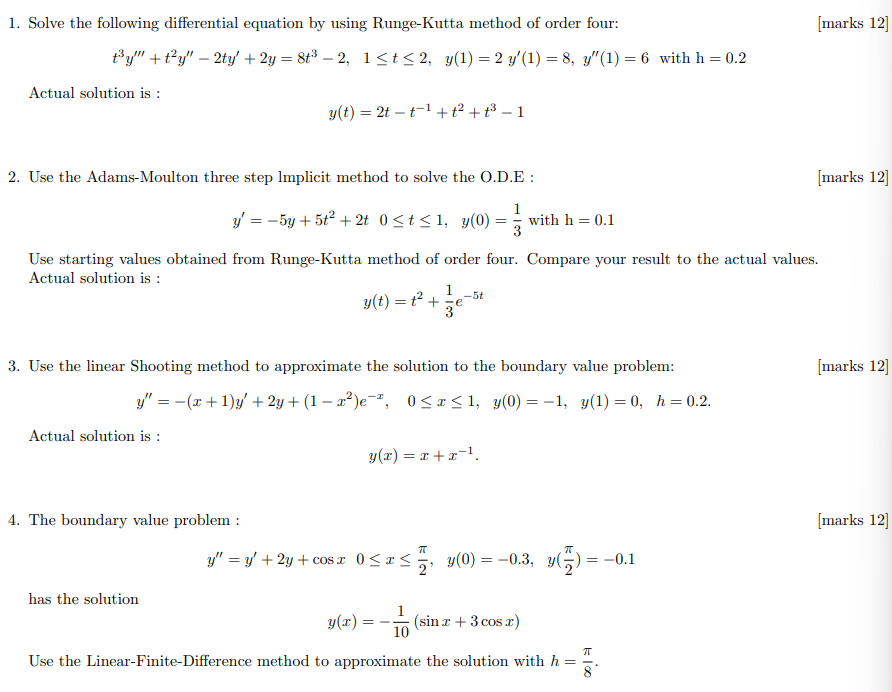



In [63]:
# RK4 for order 3 ODE
x, y, p, q = symbols('x y p q')
# p=y', q=y''
f = lambdify([x, y, p, q], -q/x + 2*p/(x**2) - 2*y/(x**3) +8 -2/(x**3) )
act =  lambdify([x], 2*x - 1/x + x*x + (x**3) -1)

a, y0, p0, q0, b = (1, 2, 8, 6, 2)
h = 0.2
n = int((b - a)/h)

x, y, p, q= rk4_3(f, a, y0, p0, q0, h, n)
for i in range(0, n+1):
  err = abs(y[i] - act(x[i]))
  print(f"x = {x[i]:.1f}, \t y' = {p[i]},\t act = {act(x[i])}, \t y = {y[i]}, \t err = {err}")

x = 1.0, 	 y' = 8,	 act = 2.0, 	 y = 2, 	 err = 0.0
x = 1.2, 	 y' = 9.414750358582065,	 act = 3.734666666666666, 	 y = 3.7346396193338345, 	 err = 2.7047332831653392e-05
x = 1.4, 	 y' = 11.190626895777307,	 act = 5.789714285714284, 	 y = 5.789742627149508, 	 err = 2.834143522356669e-05
x = 1.6, 	 y' = 13.271121741328002,	 act = 8.231000000000002, 	 y = 8.231114377089533, 	 err = 0.00011437708953110359
x = 1.8, 	 y' = 15.62920276414479,	 act = 11.116444444444445, 	 y = 11.116662521585537, 	 err = 0.00021807714109201015
x = 2.0, 	 y' = 18.25062339944062,	 act = 14.5, 	 y = 14.500335865040103, 	 err = 0.0003358650401033003


In [64]:
# 3 step
x, y = symbols('x y')
f = lambdify([x, y],  -5*y+5*(x**2)+2*x)
act = lambdify([x],  (x**2) + exp(-5*x)/3)
a = 0
b = 1
y0 = 1/3
h = 0.1
n = int((b - a)/h)

x, y = rk4_1(f, a, y0, n, h)

print("RK 4 values:")
for i in range(0, 3):
  print(f"x = {x[i]:.1f}, \t y = {y[i]}")

for i in range(3, n+1):
  temp = y[i-1] + (h/24) * (19*f(x[i-1],y[i-1]) - 5*f(x[i-2],y[i-2]) + f(x[i-3],y[i-3]))
  y[i] = ((h/24)*9*(5*(x[i]**2)+2*x[i]) + temp) / (1 + 5*(h*9/24)) #making y[i] the subject

print("Adam-Moulton values:")
for i in range(0, n+1):
  err = abs(y[i]-act(x[i]))
  print(f"x = {x[i]:.1f}, \t y = {y[i]},\t act = {act(x[i])},\t err = {err}")

1. K1=-0.16667, K2=-0.11375, K3=-0.12698, K4=-0.07818, y=0.21228
2. K1=-0.08114, K2=-0.04461, K3=-0.05374, K4=-0.01927, y=0.16277
3. K1=-0.02138, K2=0.00521, K3=-0.00144, K4=0.02434, y=0.16452
4. K1=0.02274, K2=0.04331, K3=0.03817, K4=0.05866, y=0.20524
5. K1=0.05738, K2=0.07428, K3=0.07006, K4=0.08735, y=0.27748
6. K1=0.08626, K2=0.10095, K3=0.09728, K4=0.11262, y=0.37670
7. K1=0.11165, K2=0.12499, K3=0.12165, K4=0.13582, y=0.50016
8. K1=0.13492, K2=0.14744, K3=0.14431, K4=0.15777, y=0.64619
9. K1=0.15691, K2=0.16893, K3=0.16592, K4=0.17894, y=0.81378
10. K1=0.17811, K2=0.18983, K3=0.18690, K4=0.19966, y=1.00232
RK 4 values:
x = 0.0, 	 y = 0.3333333333333333
x = 0.1, 	 y = 0.21228298611111107
x = 0.2, 	 y = 0.16276545771846063
Adam-Moulton values:
x = 0.0, 	 y = 0.3333333333333333,	 act = 0.3333333333333333,	 err = 0.0
x = 0.1, 	 y = 0.21228298611111107,	 act = 0.2121768865708778,	 err = 0.00010609954023327317
x = 0.2, 	 y = 0.16276545771846063,	 act = 0.16262648039048078,	 err = 0.00

In [65]:
#linear shooting
x, y, p= symbols('x y p')
# y" = p(x) y' + q(x) y + r(x)., (a,y0),(b,yn)
a = 0
b = 1
y0 = -1
yn = 0
h = 0.2
n = int((b - a)/h)

f1 = lambdify([x, y, p],  -(x+1)*p + 2*y + (1-(x**2))*exp(-x))
f2 = lambdify([x, y, p],  -(x+1)*p + 2*y)
print("Y1 RK4 values:")
x, y1 = rk4_2(f1, a, y0, 0, h, n)
print("Y2 RK4 values:")
x, y2 = rk4_2(f2, a, 0, 1, h, n)

y = [0]*100

for i in range(0, n+1):
  y[i] = y1[i] + (yn - y1[n])*(y2[i]/y2[n])

print("Linear shooting values:")
for i in range(0, n+1):
  #err = abs(y[i]-(2*((x[i]**4) - (x[i]**2))))
  print(f"x = {x[i]:.2f}, \t y1 = {y1[i]:.7f}, \t y2 = {y2[i]:.7f}, \t y = {y[i]:.7f}")

Y1 RK4 values:
1. K1=0.00000, K2=-0.02000, K3=-0.01988, K4=-0.04059, y=-1.02006, y'=-0.20094
2. K1=-0.04019, K2=-0.06045, K3=-0.06045, K4=-0.08153, y=-1.08065, y'=-0.40540
3. K1=-0.08108, K2=-0.10169, K3=-0.10158, K4=-0.12293, y=-1.18241, y'=-0.61215
4. K1=-0.12243, K2=-0.14311, K3=-0.14278, K4=-0.16407, y=-1.32545, y'=-0.81759
5. K1=-0.16352, K2=-0.18387, K3=-0.18333, K4=-0.20416, y=-1.50913, y'=-1.01780
Y2 RK4 values:
1. K1=0.20000, K2=0.18000, K3=0.18420, K4=0.16668, y=0.18251, y'=0.83740
2. K1=0.16748, K2=0.15468, K3=0.15802, K4=0.14718, y=0.33919, y'=0.73908
3. K1=0.14782, K2=0.14069, K3=0.14324, K4=0.13761, y=0.48140, y'=0.69039
4. K1=0.13808, K2=0.13524, K3=0.13710, K4=0.13538, y=0.61776, y'=0.67855
5. K1=0.13571, K2=0.13599, K3=0.13730, K4=0.13840, y=0.75454, y'=0.69299
Linear shooting values:
x = 0.00, 	 y1 = -1.0000000, 	 y2 = 0.0000000, 	 y = -1.0000000
x = 0.20, 	 y1 = -1.0200604, 	 y2 = 0.1825127, 	 y = -0.6550243
x = 0.40, 	 y1 = -1.0806475, 	 y2 = 0.3391921, 	 y = -0.402

In [67]:
# Finite difference
from sympy import *
x, y, p = symbols('x y p')

x_a, x_b, y_a, y_b =  (0, 1.57079632679, -0.3, -0.1)
h = 0.39269908169  # putting "pi" here gave error
n = int((x_b-x_a)/h)

p = lambdify([x], 1)
q = lambdify([x], 2)
r = lambdify([x], cos(x))
act = lambdify([x], -(sin(x) + 3*cos(x))/10)

x, w = lin_FD(p, q, r, x_a, x_b, y_a, y_b, h)

for i in range(n+1):
  err = abs(w[i] - act(x[i]))
  print(f"x = {x[i]:.2f} \t y' = {w[i]:<15.8f} \t err = {err:<15.8f}")

x = 0.00 	 y' = -0.30000000     	 err = 0.00000000     
x = 0.39 	 y' = -0.31568540     	 err = 0.00025320     
x = 0.79 	 y' = -0.28290585     	 err = 0.00006314     
x = 1.18 	 y' = -0.20699563     	 err = 0.00019735     
x = 1.57 	 y' = -0.10000000     	 err = 0.00000000     
